In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_customers_raw = pd.read_csv('customers.csv')
df_dpu_raw = pd.read_csv('daily_product_usage.csv') #dpu is short for dayly product usage

### Visualizing the dataframes

In [3]:
df_customers_raw.head(10) #Visualizing the top of the dataframe

#CustomerID refers to customer unique identification
#CustomerSegment refers to customer's segment i.e. which functionality it has
#CustomerStatusToday says if the customer is active or not
#CustomerMrrRange refers to the monthyly revenue generated by the client

,CustomerId,CustomerSegment,CustomerStatusToday,CustomerMrrRange
0,6134,A,Ativo,Muito alto
1,1040,A,Ativo,Muito alto
2,48,A,Ativo,Muito alto
3,1088,A,Ativo,Muito alto
4,577,A,Ativo,Muito alto
5,1085,A,Ativo,Médio
6,7213,A,Ativo,Muito alto
7,3575,A,Ativo,Muito alto
8,8753,A,Ativo,Muito alto
9,5320,A,Ativo,Muito alto


In [4]:
df_dpu_raw.head(10) #Visualizing the top of the dataframe

#Date refers to the action date
#CustomerID refers to customer unique identification
#FeatureId refers to what action the customer did:
            #Login
            #Funcionalidade 1 - Acesso
            #Funcionalidade 2 - Acesso
            #Funcionalidade 2 - Ação
            #Funcionalidade 3 - Acesso
            #Funcionalidade 3 - Ação
            #Funcionalidade 1 - Ação A
            #Funcionalidade 1 - Ação B
            #Funcionalidade 1 - Ação C
            #Funcionalidade 1 - Ação D

#DailyCount how many times the functionality was used that day

,Date,CustomerId,FeatureId,DailyCount
0,2020-10-26,4085,Login,22
1,2020-11-26,4068,Login,32
2,2020-10-16,6758,Login,49
3,2020-01-13,3812,Login,25
4,2020-03-19,3814,Login,40
5,2020-12-14,6758,Login,60
6,2020-09-11,8058,Login,23
7,2020-08-05,8315,Login,22
8,2020-03-28,645,Login,50
9,2020-04-08,3146,Login,20


### Checking for missing values and outliers

In [5]:
#The Dpu dataframe has numerical values (daily count). Lets check if there outliers

print(df_dpu_raw.describe()) 

#with the .describe method we can see that the mean for daily count is 7 and the
#standard deviation is aprox. 18 counts. But our max value is 1775. Lets check the value that is above
#99.5% of the dataset

print("")
print("99,5% percentile value:", df_dpu_raw['DailyCount'].quantile(0.995))

#Based on this percentile we are going to remove from the dataframe every daily count greater than 98 (99.5% percentile)

         CustomerId    DailyCount
count  2.988239e+06  2.988239e+06
mean   4.453638e+03  7.056723e+00
std    2.579224e+03  1.789654e+01
min    1.000000e+00  1.000000e+00
25%    2.286000e+03  1.000000e+00
50%    4.421000e+03  3.000000e+00
75%    6.732000e+03  7.000000e+00
max    8.973000e+03  1.775000e+03

99,5% percentile value: 98.0


In [6]:
df_dpu = df_dpu_raw.copy()
df_dpu.drop(df_dpu[df_dpu['DailyCount']>98].index,inplace = True) #Remove values greater than 98
df_dpu.describe()

,CustomerId,DailyCount
count,2.973334e+06,2.973334e+06
mean,4.453610e+03,6.184741e+00
std,2.579108e+03,9.910612e+00
min,1.000000e+00,1.000000e+00
25%,2.287000e+03,1.000000e+00
50%,4.421000e+03,3.000000e+00
75%,6.732000e+03,6.000000e+00
max,8.973000e+03,9.800000e+01


In [7]:
print("***  Customers Database  ***")
print("Null values in CustomerID: ", df_customers_raw['CustomerId'].isnull().sum())
print("Null values in CustomerSegment: ", df_customers_raw['CustomerSegment'].isnull().sum())
print("Null values in CustomerStatusToday: ", df_customers_raw['CustomerStatusToday'].isnull().sum())
print("Null values in CustomerMrrRange: ", df_customers_raw['CustomerMrrRange'].isnull().sum())
print("")
print("*--------------*")
print("")
print("***  Daily Product Usage Database  ***")
print("Null values in Date: ", df_dpu['Date'].isnull().sum())
print("Null values in CustomerID: ", df_dpu['CustomerId'].isnull().sum())
print("Null values in FeatureId: ", df_dpu['FeatureId'].isnull().sum())
print("Null values in DailyCount: ", df_dpu['DailyCount'].isnull().sum())

#Only the Customers Database has missing values, on the CustomerMrrRange. Let's check if the clients with
#this Mrr missing value has some interation on the df_dpu_raw

***  Customers Database  ***
Null values in CustomerID:  0
Null values in CustomerSegment:  0
Null values in CustomerStatusToday:  0
Null values in CustomerMrrRange:  288

*--------------*

***  Daily Product Usage Database  ***
Null values in Date:  0
Null values in CustomerID:  0
Null values in FeatureId:  0
Null values in DailyCount:  0


In [8]:
print("Q: The customers quantity in each dataframe is the same?")
if df_dpu_raw['CustomerId'].unique().shape[0] == df_customers_raw['CustomerId'].unique().shape[0]:
    print('A: Yes, the two database have the same customers quantity')
else:
    print('A: No, the two databases have a different number os unique IDs')
print("")

print("Q: All the customers in the dpu database have a register on the customer database?")
aux_int=0
for customer in df_dpu['CustomerId'].unique():
    if customer in df_customers_raw['CustomerId'].unique():
        aux_int += 1
        pass
    else:
        print("A: No, there are at least one customer without ID (",customer,")")
        break
if aux_int == df_dpu['CustomerId'].unique().shape[0]:
    print("A: Yes, all the customers are registered")

Q: The customers quantity in each dataframe is the same?
A: Yes, the two database have the same customers quantity

Q: All the customers in the dpu database have a register on the customer database?
A: Yes, all the customers are registered


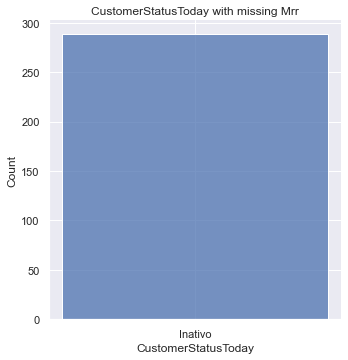

In [9]:
df_null_values = df_customers_raw[df_customers_raw['CustomerMrrRange'].isnull()]

g1 = sns.displot(x='CustomerStatusToday', data = df_null_values).set(title='CustomerStatusToday with missing Mrr')

#All the customers with missing MrrRange have an inactive status

In [10]:
df_dpu.merge(df_null_values, how='right', on='CustomerId').head(5) #Similar to a SQL Join

#But we can see that they have historical actions, so we will keep them in the dataframes

,Date,CustomerId,FeatureId,DailyCount,CustomerSegment,CustomerStatusToday,CustomerMrrRange
0,2020-12-02,3036,Funcionalidade 1 - Acesso,21,C,Inativo,NaN
1,2020-12-02,3036,Funcionalidade 2 - Ação,52,C,Inativo,NaN
2,2020-12-23,3036,Login,1,C,Inativo,NaN
3,2020-12-01,3036,Funcionalidade 2 - Ação,1,C,Inativo,NaN
4,2020-12-01,3036,Funcionalidade 1 - Ação A,1,C,Inativo,NaN


### Checking the databases

In [11]:
#Joining tables so we can make analysis without joins. With bigger databases this method can be unviable
df_merged = df_dpu.merge(df_customers_raw,how='left', on='CustomerId')
df_merged.head(10)

,Date,CustomerId,FeatureId,DailyCount,CustomerSegment,CustomerStatusToday,CustomerMrrRange
0,2020-10-26,4085,Login,22,E,Ativo,Alto
1,2020-11-26,4068,Login,32,B,Ativo,Alto
2,2020-10-16,6758,Login,49,B,Ativo,Alto
3,2020-01-13,3812,Login,25,B,Ativo,Alto
4,2020-03-19,3814,Login,40,B,Ativo,Alto
5,2020-12-14,6758,Login,60,B,Ativo,Alto
6,2020-09-11,8058,Login,23,C,Ativo,Alto
7,2020-08-05,8315,Login,22,C,Ativo,Alto
8,2020-03-28,645,Login,50,C,Ativo,Alto
9,2020-04-08,3146,Login,20,D,Ativo,Alto


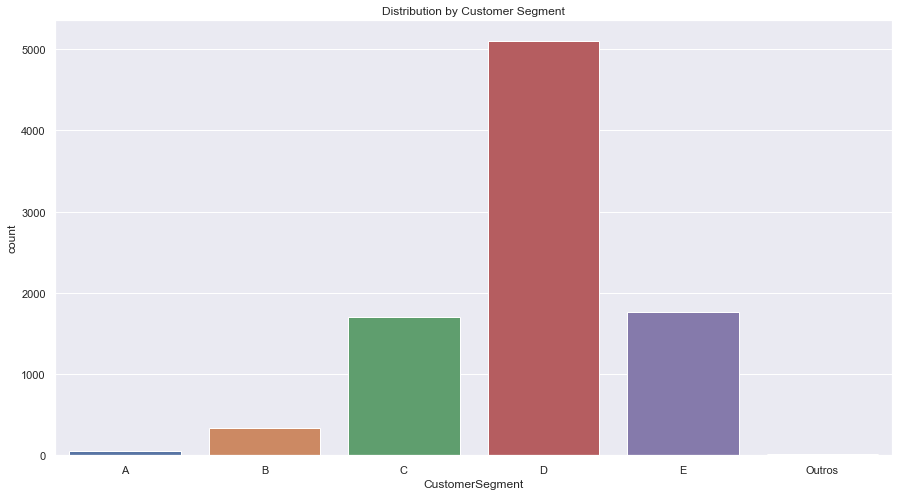

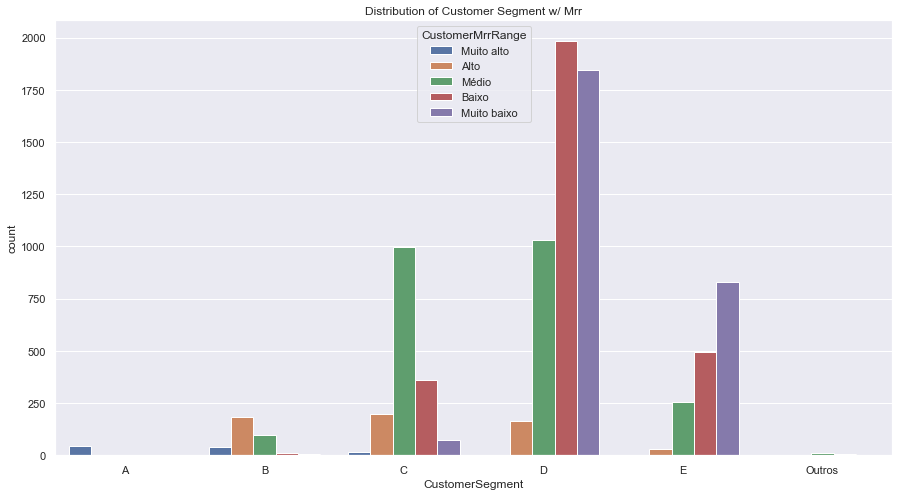

In [12]:
sns.set(rc = {'figure.figsize':(15,8)}) #Adjusts the plots sizes

sns.countplot(x='CustomerSegment', data = df_customers_raw, \
              order=['A','B','C','D','E','Outros']).set_title("Distribution by Customer Segment")

plt.show()

#sns.countplot makes a plot based on the counting of a variable. Works like a distribution plot
sns.countplot(x='CustomerSegment',hue='CustomerMrrRange', order=['A','B','C','D','E','Outros'], \
              hue_order=['Muito alto', 'Alto','Médio','Baixo','Muito baixo'], data = df_customers_raw \
              ).set_title('Distribution of Customer Segment w/ Mrr')


plt.show()

Text(0.5, 1.0, 'Avg DailyCount x FeatureId')

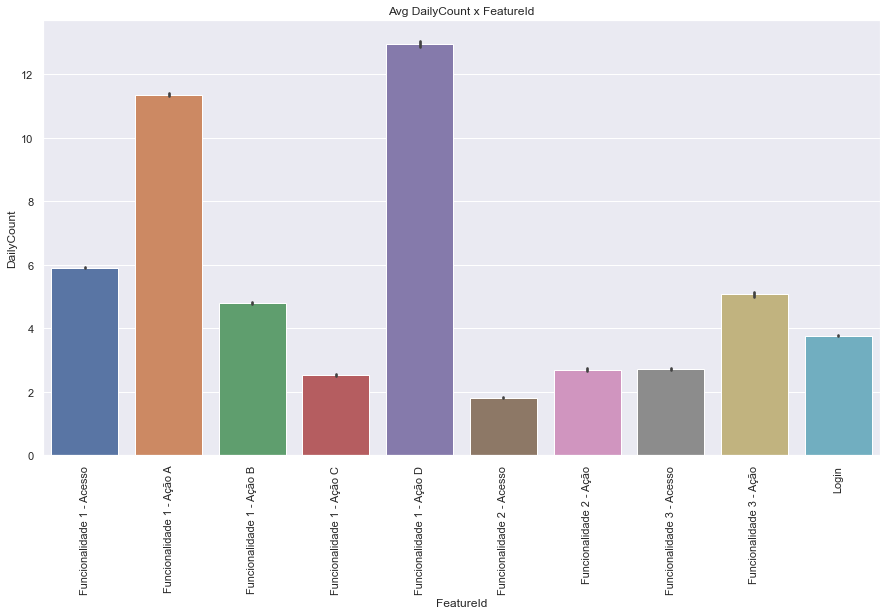

In [13]:
aux_order = list(df_merged['FeatureId'].unique())
aux_order.sort() #Auxiliar to sort the barplot

plt.xticks(rotation= 90)
sns.barplot(x='FeatureId',y='DailyCount',data=df_merged,order=aux_order).set_title("Avg DailyCount x FeatureId")

#The barplot brings the mean of the y variable
#Funcionalidade 1 - A and Funcionalidade 1 - D are the most executed actions within the product
#Between the three Funcionalidade, Funcionalidade 1 is the most executed

Text(0.5, 1.0, 'Avg DailyCount x CustomerSegment')

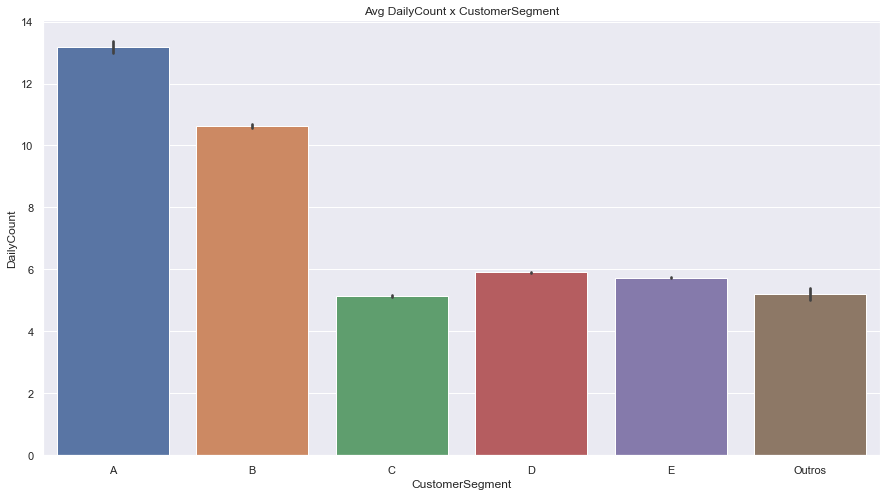

In [14]:
sns.barplot(x='CustomerSegment',y='DailyCount',data=df_merged,\
            order=['A','B','C','D','E','Outros']).set_title("Avg DailyCount x CustomerSegment")

#From this plot we can note that the A segment uses more the product than the others segments


Text(0.5, 1.0, 'DailyCount x Date')

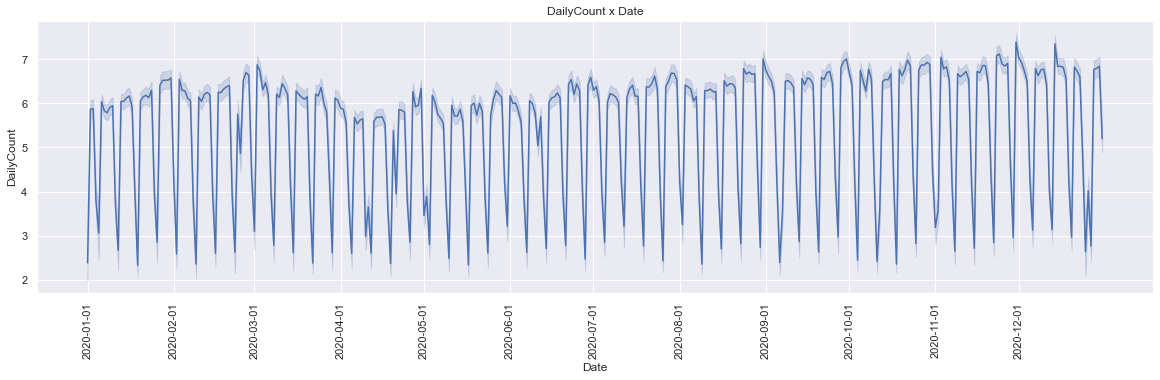

In [15]:
sns.set(rc = {'figure.figsize':(20,5)}) #Adjust the plots sizes

#Defining values to label the x-axis
x_axis_values = ['2020-01-01','2020-02-01','2020-03-01','2020-04-01',\
'2020-05-01','2020-06-01','2020-07-01','2020-08-01',\
'2020-09-01','2020-10-01','2020-11-01','2020-12-01',]

plt.xticks([0,31,60,91,121,152,182,213,244,274,305,335],x_axis_values,rotation= 90)

#makes a plot with lines. Very good to see timeseries
sns.lineplot(x='Date',y='DailyCount',data=df_dpu.sort_values(by='Date')).set_title('DailyCount x Date')

### Analysis

We can note that the majority of customers are from segment D. Unfortunately they are customers with low or
very low Mrr. They use the product's functions aprox. 6 times per day.

The segment A have a very good result, with all customers having very high Mrr and a good daily usage (two times
more than the segment D). The bad side of this is that there are few Customers A.

The time-series analysis for the daily count doesn't show any signal of tendency or sazonality. We should note that our data is from one year observation, therefore, I don't recommend rely on this as an important factor of analysis. Nevertheless, is important to keep track on this for a greater timeline to check the existance of tendencies and sazonality.

With this exploratory analysis, we can have an initial conclusion that que majority of the product's clients live
in a cluster with low profitabiliy and use. The next steps should be think of strategies to make the clients of the
D segment to make a move to the C, B or A segment. With the plots we can notice that the Mrr is related to the mean daily
use of the product. With that in mind, actions to loyalize the D customers shall be taken.

In [16]:
#At this point I tried to make one file with the merged dataframe,
#but because Google Data Studio dont accept files with more than 100mb, I divided the dataframe in two.

print("Dataframe median is ", df_merged.shape[0]/2)
df_merged1 = df_merged.sort_values('Date')[:1486667].copy()
df_merged2 = df_merged.sort_values('Date')[1486667:].copy()

print("Rows in df_merged1 = ", df_merged1.shape[0]) #Checking if both dataframes have the same size
print("Rows in df_merged2 = ", df_merged2.shape[0])

df_merged1.to_csv('df_merged1.csv',header=True, index=False) #Exporting with columns titles and without index value 
df_merged2.to_csv('df_merged2.csv',header=True, index=False) #to reduce size

Dataframe median is  1486667.0
Rows in df_merged1 =  1486667
Rows in df_merged2 =  1486667
